In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd

import os
import sys
import glob
import numpy as np
import librosa
from scipy.io import wavfile

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
df = pd.read_csv('RawData2\KL\emotion_capstone_final_dataframe.csv')

In [3]:
df.shape

(1650, 42)

In [4]:
df = pd.DataFrame(data=df)

In [5]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,emotion
0,0,-401.176761,40.388399,-47.799587,14.621850,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,...,-0.952078,2.068140,-1.707685,3.627046,-2.661033,-0.313064,-0.416730,1.828343,1.979159,angry
1,1,-301.892747,95.868674,-11.458268,40.534363,-9.330877,15.444353,-10.862431,6.102333,-0.980188,...,-0.977972,1.902699,-1.977025,2.584348,-0.160907,-2.295612,-3.892836,-2.953652,-1.189178,calm
2,2,-407.719163,54.587267,-20.149434,12.762218,8.965409,-14.100747,-1.792696,4.680410,-14.824195,...,4.040218,4.703747,4.275572,0.952382,3.142994,2.182665,7.376123,10.495854,12.959307,angry
3,3,-351.369223,90.834157,-1.748489,30.244383,-11.684535,14.431207,-11.229159,0.153730,-4.840090,...,-1.312756,0.814795,-1.876428,1.950741,-0.607374,-1.459702,-3.754882,-2.770236,0.212650,calm
4,4,-293.424697,48.372537,-45.288189,17.068676,-29.603865,6.685158,-28.981870,-5.466090,-20.983672,...,-4.210356,1.521929,-2.643460,1.188280,-1.002704,2.402358,1.114860,-0.746431,-2.054573,angry


In [6]:
df.set_index('Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-401.176761,40.388399,-47.799587,14.621850,-43.185431,5.867797,-22.586651,-12.906635,-11.655658,-9.111767,...,-0.952078,2.068140,-1.707685,3.627046,-2.661033,-0.313064,-0.416730,1.828343,1.979159,angry
1,-301.892747,95.868674,-11.458268,40.534363,-9.330877,15.444353,-10.862431,6.102333,-0.980188,3.708385,...,-0.977972,1.902699,-1.977025,2.584348,-0.160907,-2.295612,-3.892836,-2.953652,-1.189178,calm
2,-407.719163,54.587267,-20.149434,12.762218,8.965409,-14.100747,-1.792696,4.680410,-14.824195,0.241326,...,4.040218,4.703747,4.275572,0.952382,3.142994,2.182665,7.376123,10.495854,12.959307,angry
3,-351.369223,90.834157,-1.748489,30.244383,-11.684535,14.431207,-11.229159,0.153730,-4.840090,4.244757,...,-1.312756,0.814795,-1.876428,1.950741,-0.607374,-1.459702,-3.754882,-2.770236,0.212650,calm
4,-293.424697,48.372537,-45.288189,17.068676,-29.603865,6.685158,-28.981870,-5.466090,-20.983672,-10.223999,...,-4.210356,1.521929,-2.643460,1.188280,-1.002704,2.402358,1.114860,-0.746431,-2.054573,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,-358.062435,147.396788,23.699979,18.384142,4.846204,-6.655796,-17.880633,0.199721,0.122494,-15.151512,...,-0.473077,1.293610,-0.384977,2.411330,4.800443,4.259010,7.555439,5.398773,4.101442,disgust
1646,-605.129608,130.984815,29.639794,33.226497,11.118424,-11.121490,-3.089128,2.275893,-9.358654,-10.436418,...,0.906283,-0.827077,-1.197097,0.230243,-0.735232,0.180622,-0.729409,-0.790709,-1.664200,neutral
1647,-245.855328,101.373006,-9.976512,18.723278,-4.360362,-0.969544,-16.657620,-0.948999,-8.789588,2.312213,...,1.152971,1.290726,2.103982,3.195952,2.645333,2.751843,-0.354423,0.226935,1.135153,angry


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

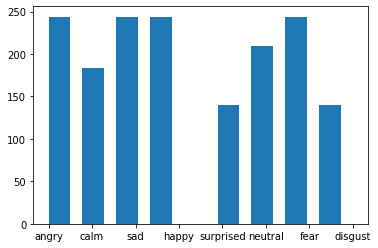

In [7]:
plt.figure()
plt.hist(df['emotion'], bins=9, width=0.5)
plt.figure

## Graph audio files

In [8]:
sample_file = 'RawData/03-01-01-01-01-01-03.wav'

In [9]:
#sample 
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_feat = 13
n_mfcc = 40 #number of MFCCs to return => number of features
n_fft = 552
window = 0.4
test_shift = 0.1
duration = 2.5
axis_mfcc = 1 #axis =0 means along the columns and axis =1 along the row

In [10]:
# X = audio time series
# sample_rate = sampling rate of X

X, sample_rate = librosa.load(sample_file, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s,
                                 mono=False)

print(X)
print(sample_rate)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.4135685e-05
 -1.0000023e-05  0.0000000e+00]
22050


In [11]:
time = np.arange(0,len(X))/sample_rate
print(time) # prints timeline

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 2.93668934e+00
 2.93673469e+00 2.93678005e+00]


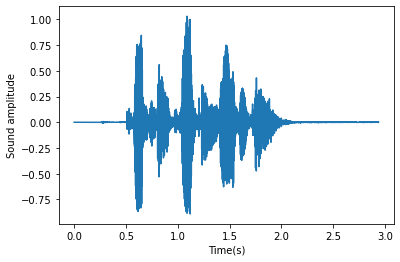

In [18]:
fig, ax = plt.subplots()
ax.plot(time,X)
ax.set(xlabel='Time(s)',ylabel='Sound amplitude')
plt.show()

C:\Users\diego\Anaconda3\envs\emotion_capstone\lib\site-packages\librosa\util\utils.py:826: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


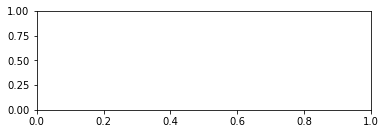

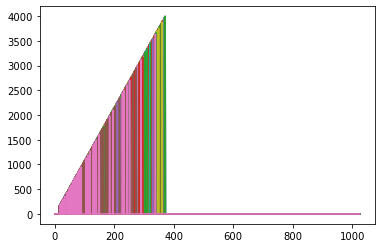

In [13]:
pitches, magnitudes = librosa.piptrack(y=X, sr=sample_rate)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

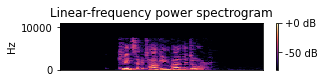

In [14]:
y, sr = librosa.load(sample_file)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [15]:
librosa_audio, librosa_sample_rate = librosa.load(sample_file)

mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 149)


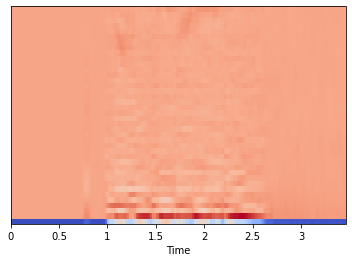

In [16]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')




NameError: name 'stft_db' is not defined

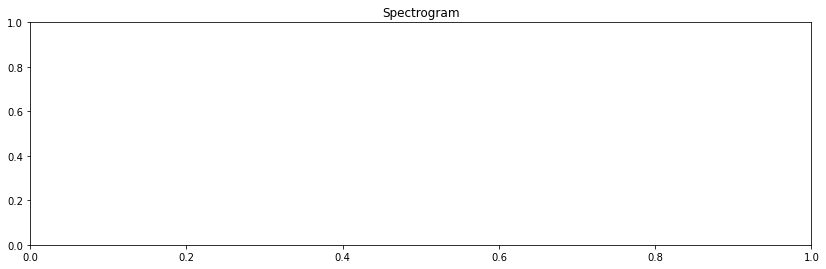

In [17]:
plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
librosa.display.specshow(stft_db, x_axis='time', y_axis='log')

plt.subplot(212)
plt.title('Audioform')
librosa.display.waveplot(y, sr=sr)

In [ ]:
librosa.feature.melspectrogram(y=X, sr=sample_rate)

D = np.abs(librosa.stft(X))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
y_fast = librosa.effects.time_stretch(X, 2.0)
time = np.arange(0,len(y_fast))/sample_rate
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#compress to be twice as fast

y_slow = librosa.effects.time_stretch(X, 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()#half the original speed

In [ ]:
S = np.abs(librosa.stft(X))
S

In [ ]:
#lms = librosa.power_to_db(S)
#lms

log_S = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
from librosa.core import istft
vocals = istft(log_S)

In [ ]:
mfccs_test = librosa.feature.mfcc(y=vocals, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
mfccs_test

In [ ]:
mfccs_final = np.mean(mfccs_test,axis = axis_mfcc)
mfccs_final

In [ ]:
S = np.abs(librosa.stft(X))
    lms = librosa.power_to_db(S**2)
    #lms = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=X,sr=sample_rate))
    mfccs = np.mean(librosa.feature.mfcc(   y=lms, 
                                            sr = mfcc_sample_rate, 
                                            n_mfcc = n_mfcc), 
                                            axis = axis_mfcc) #Can

In [ ]:
sample_rate = np.array(sample_rate)
sample_rate

In [ ]:
print(f"n_mfcc = {n_mfcc}")
print(f"sr = {mfcc_sample_rate}")

z = librosa.feature.mfcc(X, sr = mfcc_sample_rate, n_mfcc = n_mfcc)
for x in z:
    print(x)

In [ ]:
mfccs = np.mean(z, axis=1)
mfccs

In [ ]:
import seaborn as sns
# Put this into a heatmap
_min = np.amin(mfccs)
_max = np.amax(mfccs)
mfcc = (mfccs - _min) / (_max - _min)


plt.figure(figsize = (6,4))
sns.heatmap(mfcc, cmap = 'GnBu', linewidth = 1)
plt.axis('off')

In [ ]:
y,sr = librosa.load(sample_file)
print(librosa.get_duration(filename=sample_file))
print(librosa.get_duration(y=y,sr=sr))

In [ ]:

    
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr = mfcc_sample_rate, 
                                            n_mfcc = n_mfcc), 
                    axis = axis_mfcc) #Can change to axis=0 but less efficient
    feature = mfccs
    rawdata_1.loc[bookmark] = [feature]